In [8]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
import config_readwrite as crw
import h5py
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

In [9]:
SAMPLE = 9
MER, NMUTS =14, 2

In [10]:
config, cfn = crw.read(os.path.join(os.path.dirname(os.getcwd()), "config.ini"))

#read
FA = config[f"common.{MER}mer.{NMUTS}mut"]['fa_fo-true']
TSV =  config[f"common.{MER}mer.{NMUTS}mut"]["tsv_fo-true"]

#write
section="sei"
crw.check(config, section)

PATH="/wynton/home/ahituv/fongsl/nullomers/data/lock/common/sei_predictions/chromatin-profiles-hdf5"

F = f"common.{MER}mers.{NMUTS}mut.nulls.fo.ext4096.{SAMPLE}_predictions.h5"
F_LABELS = f"common.{MER}mers.{NMUTS}mut.nulls.fo.ext4096.{SAMPLE}_row_labels.txt"
COLNAMES = "/wynton/home/ahituv/fongsl/bin/sei-framework/seq_prediction_columns.txt"

config[section]["path"] = PATH
config[section]["colnames"] = COLNAMES

crw.write(config, cfn)

In [12]:
def readHdF5(filename, path):
    """
    read hdf5 file, dataset
    
    input
        filename (str) - name of hdf5 results
        path (str) - abs path to directory
        
    require 
        h5py
        
    method 
        1. assemble file
        2. read file
        3. get dataset

    return
        file, data
    
    """
    #1
    file = os.path.join(path, filename) 
    
    #2
    f = h5py.File(file, 'r')
    
    #3
    dset = f['data']

    return f, dset

def getIndexNames():
    
    """
    return list of 21097 index names corresponding to sei prediction features
    
    input
        none
    method 
        1. make a list for the index names
        2. open the index names file 
        3. append name to index name list
    
    return
        idxnames (list) - list of index names
    """
    
    #1
    idxnames = []
    
    #2
    IDXNAMES = "/wynton/home/ahituv/fongsl/bin/sei-framework/seq_prediction_columns.txt"
    with open(IDXNAMES, "r") as reader:
        for line in reader:
            #3
            idxnames.append(line.strip("\n"))
            
    return idxnames

def arrayToDF(dset):
    
    df = pd.DataFrame(np.vstack(dset))
    print(df.shape)
    df.columns = getIndexNames() # function get column names
    
    return df.reset_index()

def getRowNames(row_textfile, path):
    """
    return list corresponding to sample names
    """
    
     #1
    rownames = {}
    file = os.path.join(path, row_textfile) 
    
    #2
    with open(file, "r") as reader:
        for line in reader:
            
            #3
            idx, name = line.strip("\n").split("\t")
            if idx !="index":
                rownames[idx]=name
    df = pd.DataFrame(rownames.items(), columns= ["index_col", "id"])
    df["index_col"]=df["index_col"].astype(int)
    return df

# load data

## load hdf5

In [29]:
f, dset = readHdF5(F,PATH)

df = arrayToDF(dset)

df.head()

(210, 21907)


,index,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,U2OS|SETDB1|ENCODE,U87|NRSF|ENCODE,U87|Pol2-4H8|ENCODE,Urothelia|DNase|ENCODE,Urothelia (UT189)|DNase|ENCODE,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE
0,0,0.000029,0.076460,0.083445,0.035854,0.006369,0.135513,0.077043,0.004542,0.000281,...,0.001352,0.000155,0.000076,0.015233,0.013997,0.269379,0.045511,0.043375,0.010525,0.002684
1,1,0.000027,0.053183,0.101883,0.024467,0.007732,0.143637,0.085979,0.006601,0.000282,...,0.001216,0.000154,0.000072,0.015706,0.014154,0.282944,0.045302,0.043628,0.012006,0.003036
2,2,0.000266,0.291966,0.376553,0.006095,0.026676,0.633209,0.809130,0.000105,0.000007,...,0.000448,0.423556,0.100986,0.870638,0.747085,0.046404,0.503052,0.042062,0.941290,0.917105
3,3,0.000236,0.266002,0.289553,0.005583,0.017763,0.556130,0.772211,0.000084,0.000006,...,0.000370,0.346590,0.061780,0.816481,0.681493,0.042929,0.434568,0.043547,0.915210,0.888379
4,4,0.000488,0.046851,0.047074,0.028107,0.026424,0.424297,0.257343,0.000450,0.000091,...,0.000328,0.058182,0.028990,0.389863,0.575644,0.360126,0.286912,0.195240,0.510198,0.676211


## get row names

In [30]:
names = getRowNames(F_LABELS, PATH)

# add to dataframe
df = pd.merge(names, df, how="left", left_on ="index_col", right_on = "index")

# drop the index_col name (redundant)
df = df.drop(columns=["index_col", "index"])

# format dataframe

In [62]:
df["pair_id"] = df["id"].apply(lambda x: x.split("-")[0])
df["sequence_name"] = df["id"].apply(lambda x: "-".join((x.split(",")[0]).split("-")[1:]))

# add kmer info
df["nullomer"] = True 
df.loc[df["sequence_name"].str.contains("null"), "nullomer" ] = False

df["seq"] = df['sequence_name'].apply(lambda x: x.split(".")[0])
df.head()

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,Urothelia (UT189)|DNase|ENCODE,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,seq
0,"891-AGAGCTCGGACGCT.null-0,chr10:22532616-22532...",0.000029,0.076460,0.083445,0.035854,0.006369,0.135513,0.077043,0.004542,0.000281,...,0.013997,0.269379,0.045511,0.043375,0.010525,0.002684,891,AGAGCTCGGACGCT.null-0,False,AGAGCTCGGACGCT
1,891-chr10:22532616-22532816.147,0.000027,0.053183,0.101883,0.024467,0.007732,0.143637,0.085979,0.006601,0.000282,...,0.014154,0.282944,0.045302,0.043628,0.012006,0.003036,891,chr10:22532616-22532816.147,True,chr10:22532616-22532816
2,"892-AGAGCGTAGACCGC.null-0,chr19:18563133-18563...",0.000266,0.291966,0.376553,0.006095,0.026676,0.633209,0.809130,0.000105,0.000007,...,0.747085,0.046404,0.503052,0.042062,0.941290,0.917105,892,AGAGCGTAGACCGC.null-0,False,AGAGCGTAGACCGC
3,892-chr19:18563133-18563333.105,0.000236,0.266002,0.289553,0.005583,0.017763,0.556130,0.772211,0.000084,0.000006,...,0.681493,0.042929,0.434568,0.043547,0.915210,0.888379,892,chr19:18563133-18563333.105,True,chr19:18563133-18563333
4,"893-AGAGCGCGAACGCT.null-0,chr4:128617958-12861...",0.000488,0.046851,0.047074,0.028107,0.026424,0.424297,0.257343,0.000450,0.000091,...,0.575644,0.360126,0.286912,0.195240,0.510198,0.676211,893,AGAGCGCGAACGCT.null-0,False,AGAGCGCGAACGCT


In [63]:
tsv = pd.read_csv(TSV, sep='\t')
tsv.head()

,kmer,nKmer,gcKmer,null,nNull,gcNull,pretty,coor
0,CTTGGCGTAGTCCG,2,0.64,CGTAGCGTAGTCCG,1,0.64,.G.A..........,chr15:87114925-87115125
1,CTTGGCGAATATAG,2,0.43,CGTCGCGAATATAG,1,0.50,.G.C..........,chr4:97936775-97936975
2,AAATTGCGCGTAAC,4,0.43,GAATCGCGCGTAAC,1,0.57,G...C.........,chr3:100743096-100743296
3,AAATTGCGCGTAAC,4,0.43,GAATCGCGCGTAAC,1,0.57,G...C.........,chr3:100743099-100743299
4,TTGGGCGCCGCAAT,2,0.64,TTGCGCGCCGTAAT,1,0.57,...C......T...,chr11:2239158-2239358


In [74]:
kmer = df.loc[df["nullomer"]==False]
nullomer = df.loc[df["nullomer"]==True]

In [82]:
kmer = kmer.rename(columns={"seq":"kmer"}) 
kmer["coor"] = kmer["id"].apply(lambda x: (x.split(",")[1]).split("_")[0])
kmer.head()

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,kmer,coor
0,"891-AGAGCTCGGACGCT.null-0,chr10:22532616-22532...",0.000029,0.076460,0.083445,0.035854,0.006369,0.135513,0.077043,0.004542,0.000281,...,0.269379,0.045511,0.043375,0.010525,0.002684,891,AGAGCTCGGACGCT.null-0,False,AGAGCTCGGACGCT,chr10:22532616-22532816
2,"892-AGAGCGTAGACCGC.null-0,chr19:18563133-18563...",0.000266,0.291966,0.376553,0.006095,0.026676,0.633209,0.809130,0.000105,0.000007,...,0.046404,0.503052,0.042062,0.941290,0.917105,892,AGAGCGTAGACCGC.null-0,False,AGAGCGTAGACCGC,chr19:18563133-18563333
4,"893-AGAGCGCGAACGCT.null-0,chr4:128617958-12861...",0.000488,0.046851,0.047074,0.028107,0.026424,0.424297,0.257343,0.000450,0.000091,...,0.360126,0.286912,0.195240,0.510198,0.676211,893,AGAGCGCGAACGCT.null-0,False,AGAGCGCGAACGCT,chr4:128617958-128618158
6,"894-AGAGCGCGACGCTC.null-0,chr4:74182282-741824...",0.014985,0.604246,0.866079,0.182017,0.327660,0.952221,0.957159,0.001832,0.000397,...,0.083964,0.363360,0.078134,0.522539,0.520472,894,AGAGCGCGACGCTC.null-0,False,AGAGCGCGACGCTC,chr4:74182282-74182482
8,"895-GAGCATCGTCCGCG.null-0,chr16:72200751-72200...",0.000468,0.180734,0.942116,0.044060,0.075061,0.941744,0.935871,0.000271,0.000331,...,0.884187,0.879916,0.967225,0.781895,0.870827,895,GAGCATCGTCCGCG.null-0,False,GAGCATCGTCCGCG,chr16:72200751-72200951


In [92]:
t = pd.merge(kmer, tsv[["kmer", "coor"]],
         how = "left").drop_duplicates()
         #left_on="seq", right_on="kmer")

In [93]:
t.groupby("kmer").count().sort_values(by="id")

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,Urothelia (UT189)|DNase|ENCODE,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,coor
kmer,,,,,,,,,,,,,,,,,,,,,
AAAAACGTCCGACG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GCCTCGCGAATGCG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GCCTCGAAGGTATG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GCCTCCGTCGCTCG,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
GCCTCCCATCGGTA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAACGCGATTCG,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
TCAGGCGACCGATC,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CTCAACGCGTAACG,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [94]:
t.loc[t["kmer"]=="GGAAACGCGATTCG"]

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,kmer,coor
99,"980-GGAAACGCGATTCG.null-0,chr5:111602826-11160...",0.046519,0.907252,0.995731,0.305898,0.443137,0.984574,0.981113,0.009536,0.001449,...,0.026618,0.890175,0.027006,0.934896,0.889286,980,GGAAACGCGATTCG.null-0,False,GGAAACGCGATTCG,chr5:111602826-111603026
101,"981-GGAAACGCGATTCG.null-1,chr5:111602826-11160...",0.046519,0.907252,0.995731,0.305898,0.443137,0.984574,0.981113,0.009536,0.001449,...,0.026618,0.890175,0.027006,0.934896,0.889286,981,GGAAACGCGATTCG.null-1,False,GGAAACGCGATTCG,chr5:111602826-111603026


In [71]:
tsv.loc[tsv["kmer"]=="AAAAACGTCCGACG"]

,kmer,nKmer,gcKmer,null,nNull,gcNull,pretty,coor
485,AAAAACGTCCGACG,4,0.5,CAATACGTCCGACG,1,0.57,C..T..........,chr21:43805229-43805429
486,AAAAACGTCCGACG,4,0.5,CAATACGTCCGACG,1,0.57,C..T..........,chr21:43805240-43805440


In [98]:
nullomer.loc[nullomer["pair_id"].isin(["980", "981"])]

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,Urothelia (UT189)|DNase|ENCODE,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,seq
191,980-chr5:111602826-111603026.121,0.048740,0.843759,0.984668,0.231399,0.404621,0.950536,0.935552,0.082907,0.008643,...,0.695161,0.032428,0.696545,0.038806,0.830767,0.727579,980,chr5:111602826-111603026.121,True,chr5:111602826-111603026
193,981-chr5:111602826-111603026.121,0.042538,0.843035,0.988648,0.206055,0.409043,0.954774,0.942806,0.056252,0.008379,...,0.728889,0.037360,0.736513,0.042653,0.822476,0.714888,981,chr5:111602826-111603026.121,True,chr5:111602826-111603026


In [100]:
print(nullomer.shape)
nullomer = nullomer.rename(columns={"seq":"coor"}) 
nullomer["null_id"] = nullomer["id"].apply(lambda x: (x.split("-")[2]).split(".")[1])
nullomer.head()

(111, 21912)


,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,WERI-Rb-1|CTCF|ENCODE,WERI-Rb-1|DNase|ENCODE,WI-38|CTCF|ENCODE,WI-38 (4OHTAM_20nM_72hr)|DNase|ENCODE,WI-38|DNase|ENCODE,pair_id,sequence_name,nullomer,coor,null_id
1,891-chr10:22532616-22532816.147,0.000027,0.053183,0.101883,0.024467,0.007732,0.143637,0.085979,0.006601,0.000282,...,0.282944,0.045302,0.043628,0.012006,0.003036,891,chr10:22532616-22532816.147,True,chr10:22532616-22532816,147
3,892-chr19:18563133-18563333.105,0.000236,0.266002,0.289553,0.005583,0.017763,0.556130,0.772211,0.000084,0.000006,...,0.042929,0.434568,0.043547,0.915210,0.888379,892,chr19:18563133-18563333.105,True,chr19:18563133-18563333,105
5,893-chr4:128617958-128618158.57,0.000416,0.038695,0.035810,0.026462,0.024997,0.360654,0.201108,0.000748,0.000169,...,0.356565,0.244259,0.188611,0.462953,0.637364,893,chr4:128617958-128618158.57,True,chr4:128617958-128618158,57
7,894-chr4:74182282-74182482.169,0.020361,0.637471,0.874309,0.183114,0.326022,0.947137,0.953623,0.002835,0.000593,...,0.093075,0.367160,0.090136,0.540695,0.526405,894,chr4:74182282-74182482.169,True,chr4:74182282-74182482,169
9,895-chr16:72200751-72200951.45,0.000526,0.191657,0.929504,0.046408,0.067207,0.929053,0.921192,0.000296,0.000310,...,0.885862,0.883593,0.966106,0.790415,0.873502,895,chr16:72200751-72200951.45,True,chr16:72200751-72200951,45


In [102]:
pd.merge(nullomer, tsv,
         how = "left").drop_duplicates()

,id,HeLa_Epithelium_Cervix|BTAF1|ID:1,H9_Embryonic_Stem_Cell_Embryo|EOMES|ID:1006,H9_Embryonic_Stem_Cell_Embryo|EP300|ID:1007,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1010,H9_Embryonic_Stem_Cell_Embryo|FOXH1|ID:1011,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1012,H9_Embryonic_Stem_Cell_Embryo|FOXP1|ID:1013,H9_Embryonic_Stem_Cell_Embryo|H2BK12ac|ID:1014,H9_Embryonic_Stem_Cell_Embryo|H2BK15ac|ID:1017,...,nullomer,coor,null_id,kmer,nKmer,gcKmer,null,nNull,gcNull,pretty
0,891-chr10:22532616-22532816.147,0.000027,0.053183,0.101883,0.024467,0.007732,0.143637,0.085979,0.006601,0.000282,...,True,chr10:22532616-22532816,147,AGAGCTCGGACGCT,2,0.64,CGAGCTCGTACGCT,1,0.64,C.......T.....
1,892-chr19:18563133-18563333.105,0.000236,0.266002,0.289553,0.005583,0.017763,0.556130,0.772211,0.000084,0.000006,...,True,chr19:18563133-18563333,105,AGAGCGTAGACCGC,2,0.64,CGAGCGTATACCGC,1,0.64,C.......T.....
2,893-chr4:128617958-128618158.57,0.000416,0.038695,0.035810,0.026462,0.024997,0.360654,0.201108,0.000748,0.000169,...,True,chr4:128617958-128618158,57,AGAGCGCGAACGCT,2,0.64,ATAGCGCGAACGAT,1,0.50,.T..........A.
3,893-chr4:128617958-128618158.57,0.000416,0.038695,0.035810,0.026462,0.024997,0.360654,0.201108,0.000748,0.000169,...,True,chr4:128617958-128618158,57,CGCGAACGCTAGCG,2,0.71,CGCGAACGTTATCG,2,0.57,........T..T..
4,893-chr4:128617958-128618158.57,0.000416,0.038695,0.035810,0.026462,0.024997,0.360654,0.201108,0.000748,0.000169,...,True,chr4:128617958-128618158,57,CGCGAACGCTAGCG,2,0.71,CGCGTACGCTATCG,2,0.64,....T......T..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,989-chr3:186255197-186255397.46,0.003471,0.382537,0.670610,0.071855,0.113329,0.550283,0.456905,0.036422,0.008965,...,True,chr3:186255197-186255397,46,CCACACGGTACGAG,2,0.64,CGACACGTTACGAG,1,0.57,.G.....T......
371,989-chr3:186255197-186255397.46,0.003471,0.382537,0.670610,0.071855,0.113329,0.550283,0.456905,0.036422,0.008965,...,True,chr3:186255197-186255397,46,CGCGGTGGATCGGT,2,0.71,CGCGTTAGATCGGT,2,0.57,....TC........
372,989-chr3:186255197-186255397.46,0.003471,0.382537,0.670610,0.071855,0.113329,0.550283,0.456905,0.036422,0.008965,...,True,chr3:186255197-186255397,46,CGCGGTGGATCGGT,2,0.71,CGCGTCGGATCGGT,2,0.71,....T.A.......
373,989-chr3:186255197-186255397.46,0.003471,0.382537,0.670610,0.071855,0.113329,0.550283,0.456905,0.036422,0.008965,...,True,chr3:186255197-186255397,46,TCGAGCGGAAAGAC,2,0.57,TCGAGCGTAACGAC,1,0.57,.......T..C...


# get kmer, matched null

In [17]:
# open the fasta file and make dictionary
with open(FA, "r") as reader:
    fa_dict = {}
    for value in SimpleFastaParser(reader):
        name, seq = value
        fa_dict[name] = seq

fadf = pd.DataFrame(fa_dict.items(), columns = ["sequence_name", "firstorder"])
fadf.head()

,sequence_name,firstorder
0,GACTATCGTGCGCG.null-0,GAGTATCGTACGCG
1,GACTACGGTCTACG.null-0,GACTACGATCGACG
2,GACTACCATCGACC.null-0,GACTACGATCGACG
3,GACTAGCGAGCGTA.null-0,GACTATCGCGCGTA
4,GACTATCGCCCGGA.null-0,GACTATCGCGCGTA


# format kmer, nullomer dataframes separately. 

In [18]:
def harmonizeIds(df, fadf):
    
    #1 separate kmer dataframe
    kmer = df.loc[~df["seq"].str.contains("chr")]
    
    #2 kmer id dataframe
    kmer_id = kmer[["sequence_name", "pair_id"]].drop_duplicates() # keep only kmer ids
    
    #3 match nullomer sequences with kmer ids. 
    kmer_id = pd.merge(kmer_id, fadf) 
    
    #4 separate nullomer dataframe
    nullomer = df.loc[df["seq"].str.contains("chr")]
    
    #5 rename the seq column to coor, as these values are genomic coordinates. 
    nullomer = nullomer.rename(columns={'seq':"coor"})  # rename seq to to coor column (e.g. chr1:56-90)
    
    #6 drop the sequence name column. Don't need this anymore    
    nullomer = nullomer.drop(columns = ['sequence_name']) 
    
    #7 get nullomer ids
    null_id = nullomer[["pair_id", "coor", "kmer"]].drop_duplicates()  # get nullomer ids
    
    #8 match nullomer and kmer ids
    null_id = pd.merge(null_id, kmer_id)  # add first order information to null ids
    
    # rename firstorder column to sequence column. This column has first order sequences
    null_id = null_id.rename(columns={"firstorder": "seq"})

    # add matching kmer, nullomer ids back to nullomer dataframe
    nullomer = pd.merge(nullomer, null_id, how = "left",) #on = ["pair_id", "kmer", "coor"])

    # add coordinate information from nullomer dataframe to kmer dataframe. 
    kmer = pd.merge(kmer, null_id[["pair_id", "coor"]])
    
    
    # reorder nullomer columns as kmer columns
    nullomer = nullomer[kmer.columns]

    # concatenate kmer and nullomer back together
    df = pd.concat([kmer, nullomer]).sort_values(by='pair_id')
    
    return df

## harmonize kmer, nullomer annotations

In [19]:
df = harmonizeIds(df, fadf)

df.head()

# analyze difference per 

In [21]:
df.groupby(["pair_id"])["id"].count().reset_index().sort_values(by="id")

,pair_id,id
0,891,2
69,960,2
68,959,2
67,958,2
66,957,2
...,...,...
72,963,4
13,904,4
17,908,6
77,968,6


In [32]:
dataid = '917' #"891"#

In [136]:
test = df.loc[df.pair_id ==dataid].copy().reset_index().sort_values(by=["index", "kmer"])

test = pd.melt(test, id_vars=["index", "kmer", "coor", "id", "seq", "sequence_name", "pair_id"],
        var_name="track", value_name="pred_prob")

CLS = ["K562", "HepG2"," WTC11"]
cldf = test.loc[test["track"].str.contains(CLS[0])|test["track"].str.contains(CLS[1])].copy()

In [169]:
for i in cldf["index"].unique():
    t = cldf.loc[cldf["index"]==i, ["index", "kmer", "track", "pred_prob", "id"]].drop_duplicates()


    t = pd.pivot(t, index = ["index", "track"], columns = ["kmer"], values = "pred_prob" ).reset_index()

    t["dif"] = t[False] - t[True]
    # format cldf to add celline, feature, datasetid prediction

    t["cl"] = t["track"].apply(lambda x: x.split("|")[0].split("_")[0])
    t["feature"] = t["track"].apply(lambda x: x.split("|")[1])  
    t["dataset_id"] = t["track"].apply(lambda x: x.split("|")[2])  
    break

In [170]:
t

kmer,index,track,False,True,dif,cl,feature,dataset_id
0,30,HepG2 (forskolin)|CEBPB|ENCODE,0.155175,0.087360,0.067816,HepG2 (forskolin),CEBPB,ENCODE
1,30,HepG2 (forskolin)|ERRA|ENCODE,0.074094,0.003797,0.070297,HepG2 (forskolin),ERRA,ENCODE
2,30,HepG2 (forskolin)|GRp20|ENCODE,0.076910,0.007577,0.069333,HepG2 (forskolin),GRp20,ENCODE
3,30,HepG2 (forskolin)|HNF4A|ENCODE,0.132492,0.022676,0.109816,HepG2 (forskolin),HNF4A,ENCODE
4,30,HepG2 (forskolin)|HSF1|ENCODE,0.053311,0.021059,0.032253,HepG2 (forskolin),HSF1,ENCODE
...,...,...,...,...,...,...,...,...
1614,30,K562|eGFP-HDAC8|ENCODE,0.044117,0.016685,0.027432,K562,eGFP-HDAC8,ENCODE
1615,30,K562|eGFP-JunB|ENCODE,0.065575,0.007415,0.058160,K562,eGFP-JunB,ENCODE
1616,30,K562|eGFP-JunD|ENCODE,0.095337,0.046403,0.048933,K562,eGFP-JunD,ENCODE
1617,30,K562|p300|ENCODE,0.079548,0.065860,0.013688,K562,p300,ENCODE


In [163]:
cldf

,index,kmer,coor,id,seq,sequence_name,pair_id,track,pred_prob
852,30,False,chr16:76265521-76265721,917-chr16:76265521-76265721.91,GCGTCGCGTTATAG,GCCTCGCGTTAAAG.null-0,917,HepG2_Epithelium_Liver|CEBPA|ID:1374,0.023496
853,30,True,chr16:76265521-76265721,"917-GCCTCGCGTTAAAG.null-0,chr16:76265521-76265...",GCCTCGCGTTAAAG,GCCTCGCGTTAAAG.null-0,917,HepG2_Epithelium_Liver|CEBPA|ID:1374,0.060711
854,31,False,chr22:38263985-38264185,917-chr22:38263985-38264185.115,GCGTCGCGTTATAG,GCCTCGCGTTAAAG.null-0,917,HepG2_Epithelium_Liver|CEBPA|ID:1374,0.032670
855,31,True,chr22:38263985-38264185,"917-GCCTCGCGTTAAAG.null-0,chr16:76265521-76265...",GCCTCGCGTTAAAG,GCCTCGCGTTAAAG.null-0,917,HepG2_Epithelium_Liver|CEBPA|ID:1374,0.060711
856,32,False,chr22:38264015-38264215,917-chr22:38264015-38264215.85,GCGTCGCGTTATAG,GCCTCGCGTTAAAG.null-0,917,HepG2_Epithelium_Liver|CEBPA|ID:1374,0.088980
...,...,...,...,...,...,...,...,...,...
128695,30,True,chr16:76265521-76265721,"917-GCCTCGCGTTAAAG.null-0,chr16:76265521-76265...",GCCTCGCGTTAAAG,GCCTCGCGTTAAAG.null-0,917,K562|ZNF274|ENCODE-1,0.000022
128696,31,False,chr22:38263985-38264185,917-chr22:38263985-38264185.115,GCGTCGCGTTATAG,GCCTCGCGTTAAAG.null-0,917,K562|ZNF274|ENCODE-1,0.000020
128697,31,True,chr22:38263985-38264185,"917-GCCTCGCGTTAAAG.null-0,chr16:76265521-76265...",GCCTCGCGTTAAAG,GCCTCGCGTTAAAG.null-0,917,K562|ZNF274|ENCODE-1,0.000022
128698,32,False,chr22:38264015-38264215,917-chr22:38264015-38264215.85,GCGTCGCGTTATAG,GCCTCGCGTTAAAG.null-0,917,K562|ZNF274|ENCODE-1,0.000027


<Axes: xlabel='dif', ylabel='Count'>

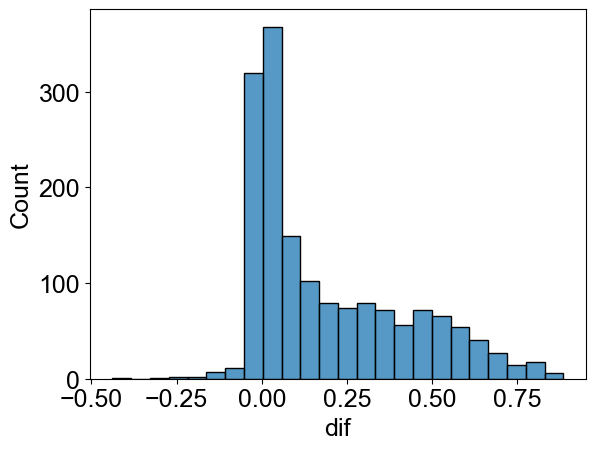

In [156]:
sns.histplot (t["dif"])

In [89]:
for i in np.arange(n_nulls):
    i +=1
    cldf[f"difnull.{i}"] = cldf[cldf.columns[i*2-1]]- cldf[cldf.columns[i*2]].astype(float)

/scratch/fongsl/ipykernel_39724/3729851334.py:3: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  cldf[f"difnull.{i}"] = cldf[cldf.columns[i*2-1]]- cldf[cldf.columns[i*2]].astype(float)
/scratch/fongsl/ipykernel_39724/3729851334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf[f"difnull.{i}"] = cldf[cldf.columns[i*2-1]]- cldf[cldf.columns[i*2]].astype(float)
/scratch/fongsl/ipykernel_39724/3729851334.py:3: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  cldf[f"difnull.{i}"] = cldf[cldf.columns[i*2-1]]- cldf[cldf.columns[i*2]].astype(float)

In [90]:
cldf.head()

index                                   index        30                  31  \
kmer                                              False      True     False   
pair_id                                             917       917       917   
142      HepG2_Epithelium_Liver|CEBPA|ID:1374  0.023496  0.060711   0.03267   
143      HepG2_Epithelium_Liver|CEBPA|ID:1375  0.029297  0.101932  0.059556   
144       HepG2_Epithelium_Liver|CTCF|ID:1380  0.475155  0.006144  0.007684   
145       HepG2_Epithelium_Liver|CTCF|ID:1381  0.016057  0.000747  0.000856   
146       HepG2_Epithelium_Liver|CTCF|ID:1382  0.397062  0.007086  0.005731   

index                    32               cl feature dataset_id difnull.1.0  \
kmer         True     False      True                                         
pair_id       917       917       917                                         
142      0.060711   0.08898  0.060711  HepG2   CEBPA    ID:1374   -0.037216   
143      0.101932    0.1381  0.101932  HepG2   CEBPA    ID:1375   -0.072634   
144      0.006144  0.007563  0.006144  HepG2    CTCF    ID:1380    0.469011   
145      0.000747  0.000978  0.000747  HepG2    CTCF    ID:1381    0.015311   
146      0.007086  0.007146  0.007086  HepG2    CTCF    ID:1382    0.389976   

index   difnull.2.0 difnull.3.0  
kmer                             
pair_id                          
142       -0.028041    0.028268  
143       -0.042375    0.036169  
144         0.00154    0.001419  
145        0.000109    0.000231  
146       -0.001355     0.00006

In [87]:
# format cldf to add celline, feature, datasetid prediction

cldf["cl"] = cldf["index"].apply(lambda x: x.split("|")[0].split("_")[0])
cldf["feature"] = cldf["index"].apply(lambda x: x.split("|")[1])  
cldf["dataset_id"] = cldf["index"].apply(lambda x: x.split("|")[2])  


/scratch/fongsl/ipykernel_39724/2601833608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf["cl"] = cldf["index"].apply(lambda x: x.split("|")[0].split("_")[0])
/scratch/fongsl/ipykernel_39724/2601833608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf["feature"] = cldf["index"].apply(lambda x: x.split("|")[1])
/scratch/fongsl/ipykernel_39724/2601833608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [88]:
cldf.head()

index                                   index        30                  31  \
kmer                                              False      True     False   
pair_id                                             917       917       917   
142      HepG2_Epithelium_Liver|CEBPA|ID:1374  0.023496  0.060711   0.03267   
143      HepG2_Epithelium_Liver|CEBPA|ID:1375  0.029297  0.101932  0.059556   
144       HepG2_Epithelium_Liver|CTCF|ID:1380  0.475155  0.006144  0.007684   
145       HepG2_Epithelium_Liver|CTCF|ID:1381  0.016057  0.000747  0.000856   
146       HepG2_Epithelium_Liver|CTCF|ID:1382  0.397062  0.007086  0.005731   

index                    32               cl feature dataset_id  
kmer         True     False      True                            
pair_id       917       917       917                            
142      0.060711   0.08898  0.060711  HepG2   CEBPA    ID:1374  
143      0.101932    0.1381  0.101932  HepG2   CEBPA    ID:1375  
144      0.006144  0.007563  0.006144  HepG2    CTCF    ID:1380  
145      0.000747  0.000978  0.000747  HepG2    CTCF    ID:1381  
146      0.007086  0.007146  0.007086  HepG2    CTCF    ID:1382

In [ ]:
cldf.groupby(["cl", "feature"])[[("891", True), ("891", False), ("difnull",'')]].mean().sort_values(by="difnull")

In [ ]:
means = cldf.groupby(["cl", "feature"])[[("891", True), ("891", False), ("difnull",'')]].mean().reset_index().sort_values(by="difnull")

In [ ]:
means.loc[means["feature"].str.contains("H3")].sort_values(by=("difnull", ''))